# Industrial Bioreactor Batch Analysis -> **Golden Batch**
### Programming for Data Analytics - Final Project
**By Stephen Kerr**

---

## Executive Summary

**need to revisit**

This project applies Multivariate Data Analysis (MVDA) techniques to industrial penicillin production data from the IndPenSim V3 simulator. 
The analysis focuses on 10 batches from a full dataset of 100 batches that contain 4 distinct operating modes. The 10 batches in this analysis represent recipe-driven control, which will be the bases of **golden batch** operation, establising the baseline for normal process behaviour. This baseline is **critical** for pharmaceutical Quality by Design (QbD) and can be used for future comparison against operator-controlled batches, Advanced Proces Control Techniques (APC) and fault / devation batches. 

#### **Notebook Layout:** 
1. Introduction & Context,
2. Data Acquisition & Understanding,
3. Data Cleaning & Preprocessing,
4. Exploratory Data Analysis,
5. Advanced Analytics: MVDA Implementation
   - Principal Component Analysis (PCA),
   - Clustering Analysis,
   - Hotelling's T^2 Analysis, (maybe)
   - Correlation Network Analysis, (maybe)
6. Process Understanding Insights,
   - Parameter Importance & Interdependencies,
   - Normal Operating Ranges (95%),
   - Process Phase Characterization (Lag, Exponential, Stationary, Late),
   - Process Consistency Metrics,
7. Conclusions


  

----

 
  

## 1. **Introduction & Context**

### Industry Background

**Pharmaceutical Quality by Design (QbD):**  
Modern regulatory frameworks (ICH Q8-Q11) require manufacturers to demonstrate process understanding through data-driven approaches—exactly what this analysis provides.

##### Why this **"Golden Batch"** Matters:

- Recipe-driven batches represent ideal, reproducible operations 
- The **Golden Batch** forms the reference standard for the pharmaceutical process validation.
- Enables future comparison for procedures (operator or Advanced Process Control).
- This is again critical for regulatory compliance.

---

### Dataset Context

**Source:** Goldrick et al. (2015), *Journal of Biotechnology* 193:70-82  
**Process:** Industrial-scale penicillin production via fed-batch fermentation  
**Scale:** 100,000L bioreactor (significantly larger than typical research-scale equipment)  
**Organism:** *Penicillium chrysogenum* (industrial strain)  
**Data:** Batches 1 to 10 where subseted from a larger dataset.

| Batch Number | Opeation Control Type | Details | 
|-------------|-----------|---------|
| 1 - 30 | Recipe-driven control | Our data was taken from this group. | 
| 31 - 60 | Operator-controlled | Manual intervention. |
| 61 - 90 | Advanced Process Control (APC) | Controlled by technology e.g., Ramen spectroscopy. |  
| 91 - 100 | Batch with known Faults / deviations | Batches that have deviations. | 

**Why This Dataset?**

In the Life Sciences industry, batch analytics and process understanding are not merely commercial advantages—they are **regulatory requirements**. Before any drug product reaches patients, regulatory bodies (FDA, EMA) demand rigorous process characterization and evidence of consistent manufacturing control. This project mirrors real-world challenges faced by bioprocess engineers daily.

---

### Project Objectives

#### Primary Goal - **"Golden Batch"** Framework

Establish the "golden batch" baseline characteristics using recipe-driven batches. 

#### Specific Research Questions
1. **What defines the "golden batch" operating space?**  
   Process parameter ranges, corrrelations, dynamics
   
2. **How consistent are recipe-driven batches?**  
   Batch-to-Batch variablity
   
3. **What are the Critical Parameters that must be maintained?**  
   **need to revisite this**

4. **What multivariate signatures characterize successful, controlled operation?**  

##### Future Applications (beyond this project):
- Compare operator-controlled batches (31-60) against the baseline.
- Evaluate APC Performance (61-90) vs. recipe-driven.
- Develop fault detection models using the fault batches (91-100).

## **2. Data Acquisition & Understanding**

### Import Python Packages

In [1]:
# imports

import pandas as pd # data manipulation and analysis

import matplotlib.pyplot as plt # plotting data

import os # operating system (file creation, deletion, etc.)

import re # regular expressions

### Load & Inspect Data

In [2]:
# load the data set 
df_batch_1_10 = pd.read_csv("./data/batches-subset-1-10.csv")

# show the info of the data set
df_batch_1_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11585 entries, 0 to 11584
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Time (h)                                                            11585 non-null  float64
 1   Aeration rate(Fg:L/h)                                               11585 non-null  int64  
 2   Agitator RPM(RPM:RPM)                                               11585 non-null  int64  
 3   Sugar feed rate(Fs:L/h)                                             11585 non-null  int64  
 4   Acid flow rate(Fa:L/h)                                              11585 non-null  float64
 5   Base flow rate(Fb:L/h)                                              11585 non-null  float64
 6   Heating/cooling water flow rate(Fc:L/h)                             11585 non-null  float64
 7   Heating water

In [3]:
# display the first 5 rows of the data set
df_batch_1_10.head(5)

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),batch_id
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,0.480510,0.19595,NaN,NaN,0.034045,0,NaN,0,0,1
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,0.058147,0.20390,NaN,NaN,0.038702,0,NaN,0,0,1
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,-0.041505,0.20575,NaN,NaN,0.040240,0,NaN,0,0,1
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,-0.056737,0.20602,NaN,NaN,0.041149,0,NaN,0,0,1
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,-0.049975,0.20589,1.017800e-25,0.52808,0.041951,0,4.083,0,0,1


### Data Dictionary 

The following Columns (Process Parameters) can be seen in the data set: 


| Column Name | Process Parameter Type | Details | 
|-------------|-----------|---------|
| Time (h) | Metadata (Process Information / Not Measured) | Time of data recording |
| Aeration rate (Fg:L/h) | Flow Rate (Manipulated Variable) - Continuous | Oxygen supply |
| Agitator RPM (RPM:RPM) | Flow Rate (Manipulated Variable) - Continuous | Mixing speed |
| Sugar feed rate (Fs:L/h) | Flow Rate (Manipulated Variable) - Continuous | Carbon Source input |
| Acid flow rate (Fa:L/h) | Flow Rate (Manipulated Variable) - Continuous | pH control (acid) |
| Base flow rate (Fb:L/h) | Flow Rate (Manipulated Variable) - Continuous | pH control (base) |
| Heating/cooling water flow rate (Fc:L/h) | Flow Rate (Manipulated Variable) - Continuous | Temperature control (cooling) |
| Heating water flow rate (Fh:L/h) | Flow Rate (Manipulated Variable) - Continuous | Temperature control (heating) |
| Water for injection/dilution (Fw:L/h) | Flow Rate (Manipulated Variable) - Continuous | Viscosity reduction |
| Air head pressure (pressure:bar) | Flow Rate (Manipulated Variable) - Continuous | Pressure control |
| Dumped broth flow (Fremoved:L/h) | Flow Rate (Manipulated Variable) - Continuous | Volume control (discharge) |
| Substrate concentration (S:g/L) | Process Outputs (Calculated/Measured Online) - Continuous | Model-calculated from the simulator |
| Dissolved oxygen concentration (DO2:mg/L) | Process Control Variable - Continuous | Critical for aerobic metabolism |
| Penicillin concentration (P:g/L) | Process Outputs (Calculated/Measured Online) - Continuous | Model-calculated from the simulator |
| Vessel Volume (V:L) | Process Outputs (Calculated/Measured Online) - Continuous | Load cell measurement |
| Vessel Weight (Wt:Kg) | Process Outputs (Calculated/Measured Online) - Continuous | Load cell measurement|
| pH (pH:pH) | Process Control Variable - Continuous | Enzyme acivity control |
| Temperature (T:K) | Process Control Variable - Continuous | Metabolic rate control |
| Generated heat (Q:kJ) | Process Outputs (Calculated/Measured Online) - Continuous | Model-calculated from the simulator |
| Carbon dioxide percent in off-gas (CO2outgas:%) | Process Outputs (Calculated/Measured Online) - Continuous | Off-gas analyzer |
| PAA flow (Fpaa: PAA flow (L/h)) | Flow Rate (Manipulated Variable) - Continuous | Precursor addition |
| PAA concentration offline (PAA_offline: PAA (g L^{-1})) | Offline Lab Measurement (Manual Sampling) - Discrete | HPLC analysis |
| Oil flow (Foil:L/hr) | Flow Rate (Manipulated Variable) - Continuous | Secondary carbon + antifoam |
| NH₃ concentration offline (NH3_offline: NH3 (g L^{-1})) | Offline Lab Measurement (Manual Sampling) - Discrete | Chemical analysis |
| Oxygen Uptake Rate (OUR: g min^{-1}) | Process Outputs (Calculated/Measured Online) - Continuous | Calculated from off-gas |
| Oxygen percent in off-gas (O2: %) | Process Outputs (Calculated/Measured Online) - Continuous | Off-gas analyzer |
| Offline Penicillin concentration (P_offline: P (g L^{-1})) | Offline Lab Measurement (Manual Sampling) - Discrete | HPLC/Bioassay |
| Offline Biomass concentration (X_offline: X (g L^{-1})) | Offline Lab Measurement (Manual Sampling) - Discrete | Dry weight method |
| Carbon evolution rate (CER:g/h) | Process Outputs (Calculated/Measured Online) - Continuous | Off-gas analyzer |
| Ammonia shots (NH3_shots:kgs) | Process Outputs (Calculated/Measured Online) - Continuous | Discrete additions (tracked) |
| Viscosity (Viscosity_offline: centPoise) | Offline Lab Measurement (Manual Sampling) - Discrete | Viscometer |
| Fault reference (Fault_ref) | Metadata (Process Information / Not Measured) | Fault Flag |
| 0 - Recipe driven / 1 - Operator controlled (Control_ref) | Metadata (Process Information / Not Measured) | Control Type Flag |
| batch_id | Metadata (Process Information / Not Measured) | Batch Identifier added by me in Kaggle |


In [4]:
# list all the column names
df_batch_1_10.columns.tolist()

['Time (h)',
 'Aeration rate(Fg:L/h)',
 'Agitator RPM(RPM:RPM)',
 'Sugar feed rate(Fs:L/h)',
 'Acid flow rate(Fa:L/h)',
 'Base flow rate(Fb:L/h)',
 'Heating/cooling water flow rate(Fc:L/h)',
 'Heating water flow rate(Fh:L/h)',
 'Water for injection/dilution(Fw:L/h)',
 'Air head pressure(pressure:bar)',
 'Dumped broth flow(Fremoved:L/h)',
 'Substrate concentration(S:g/L)',
 'Dissolved oxygen concentration(DO2:mg/L)',
 'Penicillin concentration(P:g/L)',
 'Vessel Volume(V:L)',
 'Vessel Weight(Wt:Kg)',
 'pH(pH:pH)',
 'Temperature(T:K)',
 'Generated heat(Q:kJ)',
 'carbon dioxide percent in off-gas(CO2outgas:%)',
 'PAA flow(Fpaa:PAA flow (L/h))',
 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
 'Oil flow(Foil:L/hr)',
 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
 'Oxygen in percent in off-gas(O2:O2  (%))',
 'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
 'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
 'Carbo

### Process Parameter Types: 

#### Online /  Offline Measurements 

Some of the Columns are for **Online** measurements taken directly from the process in real-time (continuous data with no missing values). See the **Data Dictionary** above the Process Parameter Type = ***Process Outputs (Calculated/Measured Online) - Continuous*** and ***Process Control Variable - Continuous***. 


Whereas **Offline** measurements are when samples are removed from the process and taken to a lab as specific analyticl method needs to be conducted on the sample (therefore the data appears as discrete). These Columns include the 'Offline' tag in their column name and have values after certain time intervals (for example, every 12 or 24 hours). See the **Data Dictionary** above the Process Parameter Type =  ***Offline Lab Measurement (Manual Sampling) - Discrete***.

For a good explaination of the practical differences between Online and Offline see this overview artical [here](https://amf.ch/technical-note/a-guide-to-inline-online-atline-and-offline-monitoring/#:~:text=Both%20online%20and%20inline%20monitoring%20provide%20real-time%20data,can%20accommodate%20manual%20interventions%20and%20less%20frequent%20sampling.)


#### Process Controls

The above are Measurement types but there are also Process Parameters that a Scientist that is Operating the Equipment can manipulate to keep the **Critical Control Parameters** in an acceptable range for a good yield. For example, adding some feed to help the organism in the Bioreactor grow, or add a pH regulator to ensure the pH is at an optimal level for the production of whatever Product is desired. See the **Data Dictionary** above the Process Parameter Type = ***Flow Rate (Manipulated Variable) - Continuous***.  

#### Metadata
Finally there is the Metadata. See the **Data Dictionary** above the Process Parameter Type = ***Metadata (Process Information / Not Measured)***. There are only 4 in the dataset the 'batch_id', 'Time (h)', 'Fault reference(Fault_ref:Fault ref)', and '0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)'.     

I added the 'batch_id' column in my preprocessing task in kaggle to be able to discern when one batch ends and another starts. See the code used to do this [here](https://www.kaggle.com/code/stephenkerr17/bioreactor-dataset-preprocessing). But the basic approach was to locate the first reading of each batch which as our data is simualted is always `'Time (h)' == 0.2`. In non-simulated data this will be harder to locate and a flag on the machine maybe triggered to indicate the start of the batch process. Once I had the start of the batches I took the start index - 1 to find the preceding batch end (removing negative or zero indices). Now I have a start and end of each batch then looped through these assigning them a batch id. 'Time (h)' is unsurprisingly the time of the measurement in the give row. 

Finally, '0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)' is a flag that indicates what control process was followed (this is relveant for the source research but not for our analysis) and 'Fault reference(Fault_ref:Fault ref)' is a flag added to batches that have a known fault in them. I will remove both of these from the data set as they do not apply to this analysis.

### Process Understanding

#### Fermentation Phases: 
1. **Lag Phase:** Cells adapt to the fermentation environemnt. Minimal biomass accumulationan and negligible penicillin production. The cells are synthesizing enzymes and preparing for rapid growth.

2. **Exponential Growth:** Cells rapidly divide as the substrate they feed on is abundant. Penicillin production begins during this phase but is secondary to cell growth. (Also widely know as the log phase) 

3. **Stationary Phase:** Growth rate declines as fnutrients become limiting, Biomass plateaus at a maximum cell density. Peak penicillin production occurs during this phase. 

4. **Decline Phase:** Substrate depletion and accumulation of toxic metabolites leads to cell death and the overall process near harvest endpoint. 


To show that the above outline understanding of the fermentation process applies to our data we will visualise the a batch specifically. The boundaries of the different phases were validated visually using the key process indicators. Future enhancement could be to perform a Scientifically based automation for phase detection but this is not the focus of this project. 

In [5]:
# extract a single batch to display 
batch_1 = df_batch_1_10[df_batch_1_10['batch_id'] == 1]

#batch_1.info()

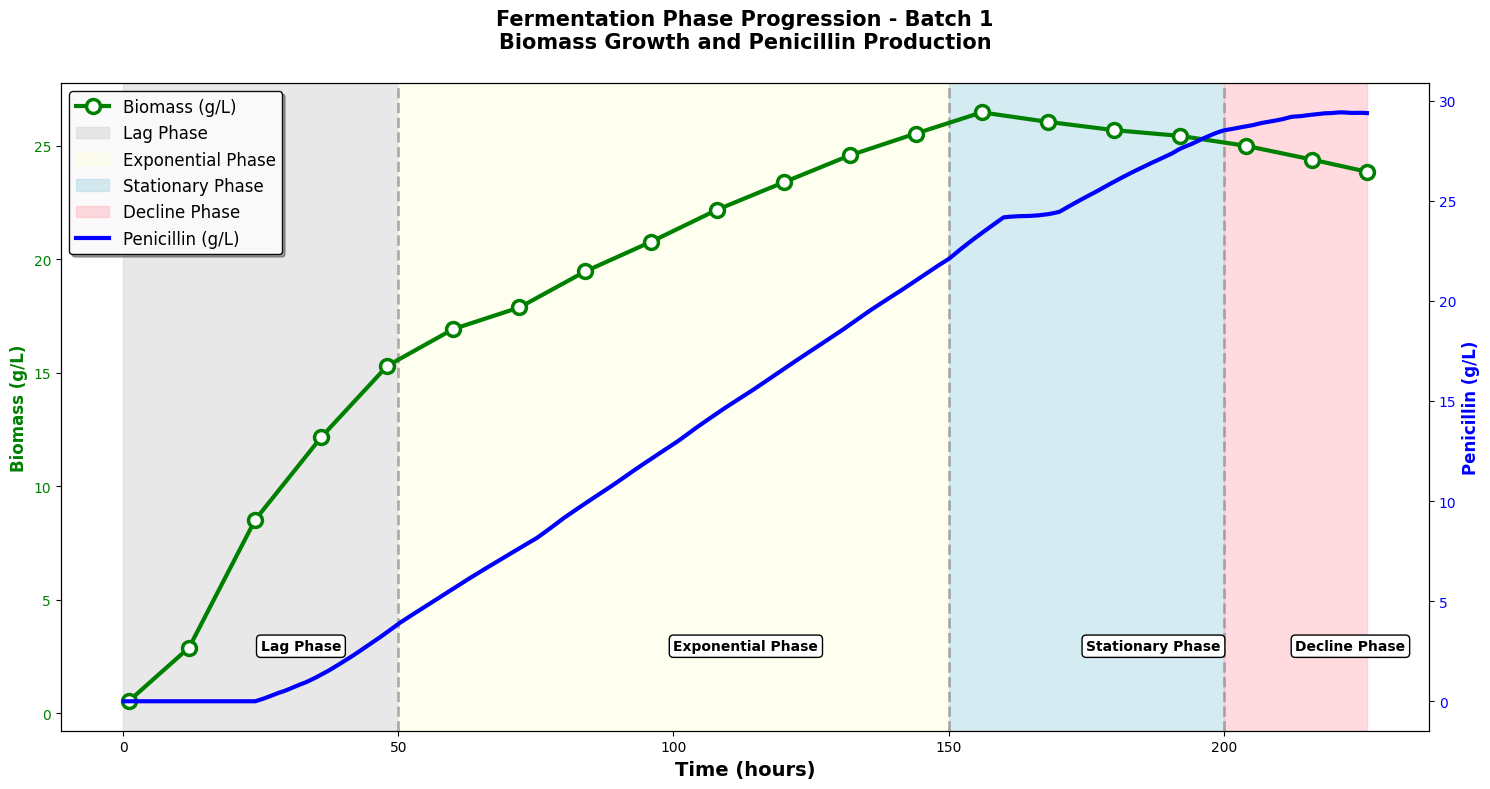

In [6]:
# display batch 1 biomass and penicillin over time

# initialize the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# define the biomass axis and labels
colour_biomass = 'green'
ax1.set_xlabel('Time (hours)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Biomass (g/L)', color=colour_biomass, fontsize=12, fontweight='bold')

# need to drop the NaN values so that my code shows a dotted line between points
biomass_clean = batch_1['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].dropna()

# plot the biomass data
biomass_plot = ax1.plot(batch_1['Time (h)'].loc[biomass_clean.index], # only plot where biomass is not NaN
                        biomass_clean,
                        'o-',
                        color=colour_biomass, 
                        label='Biomass (g/L)',
                        markersize=10,
                        linewidth=3,
                        markerfacecolor='white',
                        markeredgewidth=2.5
                        )

# customize the biomass axis ticks
ax1.tick_params(axis='y', labelcolor=colour_biomass)


# define the penicillin axis and labels
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
colour_penicillin = 'blue'
ax2.set_ylabel('Penicillin (g/L)', 
               color=colour_penicillin, 
               fontsize=12, 
               fontweight='bold')  # we already handled the x-label with ax1

# plot the penicillin data
penicillin_plot = ax2.plot(batch_1['Time (h)'], 
                           batch_1['Penicillin concentration(P:g/L)'],
                           color=colour_penicillin,
                           linewidth=3,
                           label='Penicillin (g/L)',
)
# customize the penicillin axis ticks
ax2.tick_params(axis='y', labelcolor=colour_penicillin)


# add the phase background shading
phase_regions = [
    ('Lag Phase', 0, 50, 'lightgrey'),
    ('Exponential Phase', 50, 150, 'lightyellow'),
    ('Stationary Phase', 150, 200, 'lightblue'),
    ('Decline Phase', 200, batch_1['Time (h)'].max(), 'lightpink')
]

# aadding the background colours
for phase_name, start, end, color in phase_regions:
    ax1.axvspan(start, end, color=color, alpha=0.5, label=phase_name)

    # Phase label box
    mid = (start + end) / 2
    y_pos = ax1.get_ylim()[1] * 0.1  # position label at 10% of y-axis height
    ax1.text(mid, y_pos, phase_name, 
            color='black', fontsize=10, 
            fontweight='bold', 
            bbox=dict(boxstyle='round,pad=0.3',
                    facecolor='white',
                    edgecolor='black'
                    )
            )

# Add phase transition lines
for transition in [50, 150, 200]:
    ax1.axvline(x=transition, color='gray', linestyle='--', 
                linewidth=2, alpha=0.6, zorder=1)

# add title and legend
plt.title(f'Fermentation Phase Progression - Batch {batch_1['batch_id'].iloc[0]}\n' + 
              'Biomass Growth and Penicillin Production', 
              fontsize=15, fontweight='bold', pad=25)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
            loc='upper left', 
            fontsize=12, 
            framealpha=0.95,
            edgecolor='black',
            fancybox=True,
            shadow=True)

fig.tight_layout()

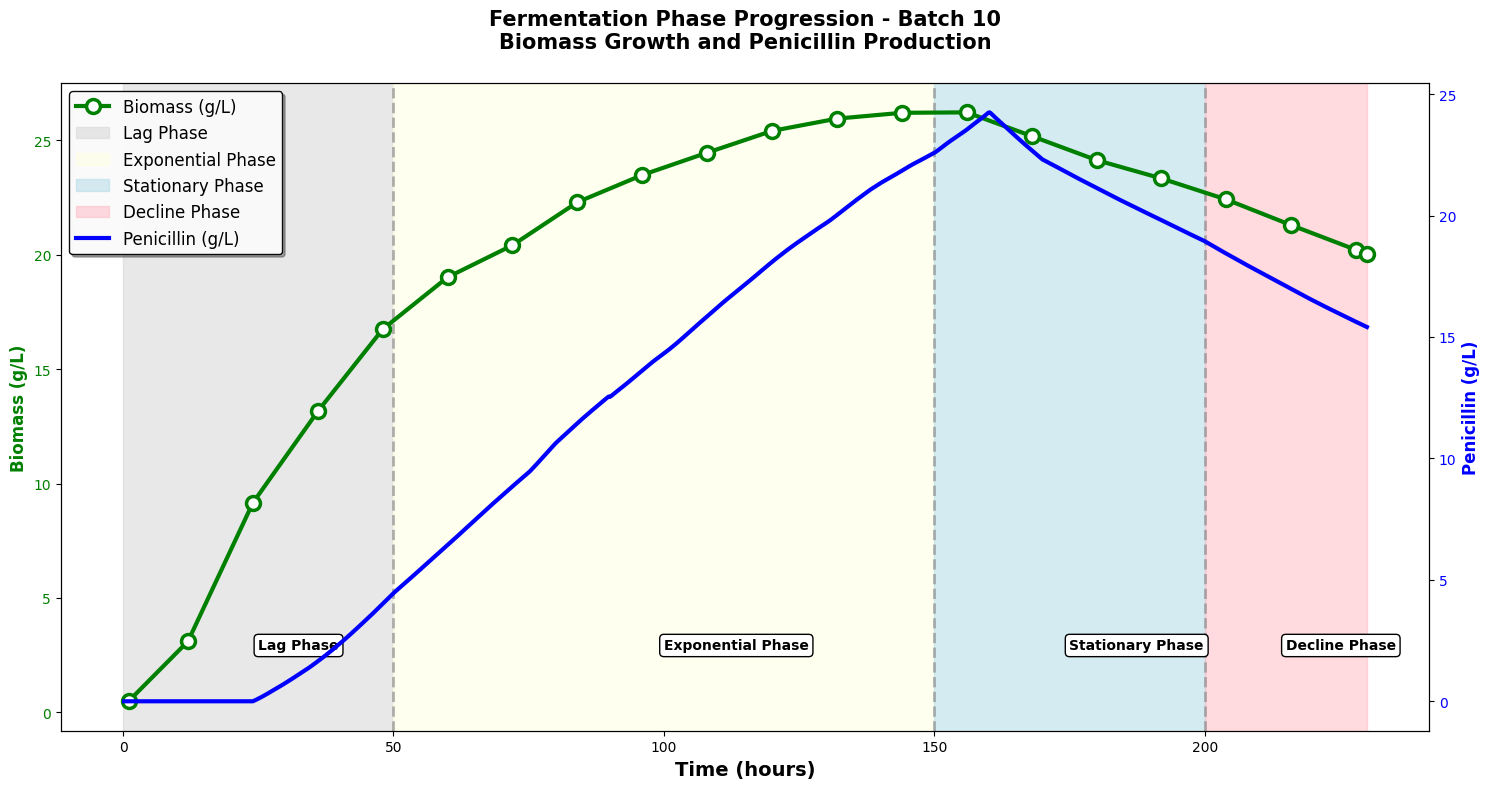

In [7]:
# turning the batch phases code into a function 
# and calling it for the other batches saving each plot as a PNG file

def plot_batch_phases(batch_df, batch_id):
    '''
    Creates a visualisation of the fermentation phases showing biomass growth 
    and penicillin production over time.

    Arguments:
    batch_df -- DataFrame containing batch data
    batch_id -- Identifier for the specific batch to plot

    Returns:
    A Figure object with the plotted data. 
    Saved as a PNG file to an Outputs folder. 

    '''

    batch_data = batch_df[batch_df['batch_id'] == batch_id]
    time = batch_data['Time (h)']

    # initialize the plot
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # define the biomass axis and labels
    colour_biomass = 'green'
    ax1.set_xlabel('Time (hours)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Biomass (g/L)', color=colour_biomass, fontsize=12, fontweight='bold')

    # need to drop the NaN values so that my code shows a dotted line between points
    biomass_clean = batch_data['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].dropna()

    # plot the biomass data
    biomass_plot = ax1.plot(time.loc[biomass_clean.index], # only plot where biomass is not NaN
                            biomass_clean,
                            'o-',
                            color=colour_biomass, 
                            label='Biomass (g/L)',
                            markersize=10,
                            linewidth=3,
                            markerfacecolor='white',
                            markeredgewidth=2.5
                            )

    # customize the biomass axis ticks
    ax1.tick_params(axis='y', labelcolor=colour_biomass)


    # define the penicillin axis and labels
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    colour_penicillin = 'blue'
    ax2.set_ylabel('Penicillin (g/L)', 
                color=colour_penicillin, 
                fontsize=12, 
                fontweight='bold')  # we already handled the x-label with ax1

    # plot the penicillin data
    penicillin_plot = ax2.plot(time, 
                            batch_data['Penicillin concentration(P:g/L)'],
                            color=colour_penicillin,
                            linewidth=3,
                            label='Penicillin (g/L)',
    )
    # customize the penicillin axis ticks
    ax2.tick_params(axis='y', labelcolor=colour_penicillin)


    # add the phase background shading
    phase_regions = [
        ('Lag Phase', 0, 50, 'lightgrey'),
        ('Exponential Phase', 50, 150, 'lightyellow'),
        ('Stationary Phase', 150, 200, 'lightblue'),
        ('Decline Phase', 200, time.max(), 'lightpink')
    ]

    # aadding the background colours
    for phase_name, start, end, color in phase_regions:
        ax1.axvspan(start, end, color=color, alpha=0.5, label=phase_name)

        # Phase label box
        mid = (start + end) / 2
        y_pos = ax1.get_ylim()[1] * 0.1  # position label at 10% of y-axis height
        ax1.text(mid, y_pos, phase_name, 
                color='black', fontsize=10, 
                fontweight='bold', 
                bbox=dict(boxstyle='round,pad=0.3',
                        facecolor='white',
                        edgecolor='black'
                        )
                )

    # Add phase transition lines
    for transition in [50, 150, 200]:
        ax1.axvline(x=transition, color='gray', linestyle='--', 
                    linewidth=2, alpha=0.6, zorder=1)

    # add title and legend
    plt.title(f'Fermentation Phase Progression - Batch {batch_data['batch_id'].iloc[0]}\n' + 
                'Biomass Growth and Penicillin Production', 
                fontsize=15, fontweight='bold', pad=25)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
                loc='upper left', 
                fontsize=12, 
                framealpha=0.95,
                edgecolor='black',
                fancybox=True,
                shadow=True)

    fig.tight_layout()

    # save the figure as a PNG file
    output_fig_path = './outputs/fermentation_phases_plots' 

    os.makedirs(output_fig_path, exist_ok=True)

    fig.savefig(output_fig_path + f'/batch_{batch_id}_phases.png'
    , dpi=300)

    return fig

# test call the function for batch 4
fig_batch_4 = plot_batch_phases(df_batch_1_10, batch_id=10)

In [8]:
# creating a wrapper function to loop through all batches and save plots
def plot_all_batches(batch_df):
    batch_ids = batch_df['batch_id'].unique()
    figs = {}
    for b in batch_ids:
        figs[b] = plot_batch_phases(batch_df, b)
        plt.close(figs[b])  # close the figure to avoid display during loop
    return figs

plot_all_batches(df_batch_1_10)

{np.int64(1): <Figure size 1500x800 with 2 Axes>,
 np.int64(2): <Figure size 1500x800 with 2 Axes>,
 np.int64(3): <Figure size 1500x800 with 2 Axes>,
 np.int64(4): <Figure size 1500x800 with 2 Axes>,
 np.int64(5): <Figure size 1500x800 with 2 Axes>,
 np.int64(6): <Figure size 1500x800 with 2 Axes>,
 np.int64(7): <Figure size 1500x800 with 2 Axes>,
 np.int64(8): <Figure size 1500x800 with 2 Axes>,
 np.int64(9): <Figure size 1500x800 with 2 Axes>,
 np.int64(10): <Figure size 1500x800 with 2 Axes>}

## 3. Data Cleaning & Preprocessing,

### Handling Missing Values and NaNs (Online & Offline Measurements, Process Controls and Metadata)

Due to the 2 different types of Data Measurements it is appropriate to handle Missing Values differently, because a NaN or Misssing Value for the **Online Measurement** could indicate a tempory sensor dropout, therefore for NaNs that aren't too large of a gap in readings (say more than 3 readings) we will forward-fill these data points in order to maintain a continuous time series without distorting the trends. For long gaps beyond the reasonable window this will be marked as missing and excluded from calculations. 

For **Offline Measurements** there will be gaps in the data due the fact that the data is discrete, therefore to prevent artifical generation of data the NaN will remain in place for the Offline measurements.

**Process Controls** and **Metadata** should not have any missing values or NaN but if they do an investigation should be conducted to ensure the data hasn't been corrupted during the data acquisition process. 

#### So given the above we need to check there are no missing values In the data set 

In [9]:
# checking the NaN values in the data set
nan_counts = df_batch_1_10.isna().sum()
print(nan_counts)

Time (h)                                                                  0
Aeration rate(Fg:L/h)                                                     0
Agitator RPM(RPM:RPM)                                                     0
Sugar feed rate(Fs:L/h)                                                   0
Acid flow rate(Fa:L/h)                                                    0
Base flow rate(Fb:L/h)                                                    0
Heating/cooling water flow rate(Fc:L/h)                                   0
Heating water flow rate(Fh:L/h)                                           0
Water for injection/dilution(Fw:L/h)                                      0
Air head pressure(pressure:bar)                                           0
Dumped broth flow(Fremoved:L/h)                                           0
Substrate concentration(S:g/L)                                            0
Dissolved oxygen concentration(DO2:mg/L)                                  0
Penicillin c

In [10]:
# checking NaN values in the online data

online_data = df_batch_1_10[['Time (h)',
 'Aeration rate(Fg:L/h)',
 'Agitator RPM(RPM:RPM)',
 'Sugar feed rate(Fs:L/h)',
 'Acid flow rate(Fa:L/h)',
 'Base flow rate(Fb:L/h)',
 'Heating/cooling water flow rate(Fc:L/h)',
 'Heating water flow rate(Fh:L/h)',
 'Water for injection/dilution(Fw:L/h)',
 'Air head pressure(pressure:bar)',
 'Dumped broth flow(Fremoved:L/h)',
 'Substrate concentration(S:g/L)',
 'Dissolved oxygen concentration(DO2:mg/L)',
 'Penicillin concentration(P:g/L)',
 'Vessel Volume(V:L)',
 'Vessel Weight(Wt:Kg)',
 'pH(pH:pH)',
 'Temperature(T:K)',
 'Generated heat(Q:kJ)',
 'carbon dioxide percent in off-gas(CO2outgas:%)', 
 'PAA flow(Fpaa:PAA flow (L/h))',
 'Oil flow(Foil:L/hr)',
 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
 'Carbon evolution rate(CER:g/h)',
 'Ammonia shots(NH3_shots:kgs)',
 'batch_id']]

online_data.isna().sum()

Time (h)                                          0
Aeration rate(Fg:L/h)                             0
Agitator RPM(RPM:RPM)                             0
Sugar feed rate(Fs:L/h)                           0
Acid flow rate(Fa:L/h)                            0
Base flow rate(Fb:L/h)                            0
Heating/cooling water flow rate(Fc:L/h)           0
Heating water flow rate(Fh:L/h)                   0
Water for injection/dilution(Fw:L/h)              0
Air head pressure(pressure:bar)                   0
Dumped broth flow(Fremoved:L/h)                   0
Substrate concentration(S:g/L)                    0
Dissolved oxygen concentration(DO2:mg/L)          0
Penicillin concentration(P:g/L)                   0
Vessel Volume(V:L)                                0
Vessel Weight(Wt:Kg)                              0
pH(pH:pH)                                         0
Temperature(T:K)                                  0
Generated heat(Q:kJ)                              0
carbon dioxi

#### Missing data Analysis

The data set is complete except for the expected gaps in the **Offline Measurements**, which are only collected at discrete sampling times. That’s normal and not a problem.
However, having few or no missing values doesn’t guarantee the data is clean. Sensors can still produce invalid readings, noise, or drifts that won’t show up as NaNs. These issues can distort the analysis just as much as missing data.
Because of that, we’ll run an outlier analysis to identify any values that don’t make physical or process sense.

#### Removing unnessecary Metadata

In [11]:
# drop unnecessary columns not relevant for analysis
df_batch_1_10 = df_batch_1_10.drop(columns=['0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)', 'Fault reference(Fault_ref:Fault ref)'])

### Outlier Analysis

As stated above outliers can impact data analysis as much as Missing Values, however identifying them can be harder.

Depending on the data type and scenario different approaches are typically followed for outlier analysis. 

### Feature engineering or Data Normalization? 

## 4. Exploratory Data Analysis

This section examines the behaviour of individual process variables in the 10 recipe-driven batches. The goals here are: 
- establish the typical operating ranges,
- quantify natural batch-to-batch variability,
- identify relationships and dynamics relevant to fermentation behaviour.

Online continuous varibales are the primary foucs because offline variables are too sparse for the distributional analysis. 

-----

2. Bivariate analysis
- correlation analysis (correlation matrix, heatmap)
    - scatter plots for hypothesis genration (final penicilin vs average, final yield vs temperature stability, biomass vs cumulative sugar feed)

3. batch comparison
- calculate batch-level metrics
    - penicillin, biomass, pH, etc., 

4. temporal analysis
- question: how do batches evolve over time? 
    - identify common phases in fermentation, 

#### Univariate Analysis 

Now we will examine each parameter individually using, Summary Statistics, Distribution plots, Time-series behaviour across batches. 

---
- for each key parameter 
    - distribution plots (histograms, KDE
    - summary statistics (mean, std, range)
    - time series plots for representative batches
- questions we should try answer: 
    - What is the typical range of each parameter? 
    - are there any unexpected distributions? 
    - which parameters show high variabiliy?

##### Summary Statistics

In [12]:
summary_stats = online_data.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Time (h),11585.0,117.111006,68.820049,2.000000e-01,58.000000,116.000000,173.800000,278.0000
Aeration rate(Fg:L/h),11585.0,65.250324,11.426350,3.000000e+01,60.000000,65.000000,75.000000,75.0000
Agitator RPM(RPM:RPM),11585.0,100.000000,0.000000,1.000000e+02,100.000000,100.000000,100.000000,100.0000
Sugar feed rate(Fs:L/h),11585.0,76.611998,23.654889,8.000000e+00,76.000000,80.000000,90.000000,150.0000
Acid flow rate(Fa:L/h),11585.0,0.087966,0.595126,0.000000e+00,0.000000,0.000000,0.000000,7.7988
Base flow rate(Fb:L/h),11585.0,61.095021,48.269333,0.000000e+00,28.834000,55.941000,78.154000,225.0000
Heating/cooling water flow rate(Fc:L/h),11585.0,63.610573,79.941359,1.000000e-04,12.222000,33.942000,89.764000,865.4100
Heating water flow rate(Fh:L/h),11585.0,21.365101,47.498069,1.000000e-04,0.000100,0.042911,12.141000,652.1700
Water for injection/dilution(Fw:L/h),11585.0,155.222270,155.167953,0.000000e+00,0.000000,100.000000,250.000000,500.0000
Air head pressure(pressure:bar),11585.0,0.944281,0.133283,6.000000e-01,0.900000,0.900000,1.100000,1.1000


##### Distribution Plot Funtion

In [ ]:
# function to plot distribution of a specified columns
def plot_distribution(df, column):
    '''
    Plots the distribution of a specified column in the DataFrame and saves it as a PNG file.
    Arguments:
    df -- DataFrame containing the data
    column -- The column name for which to plot the distribution
    Returns:
    A histogram plot saved as a PNG file in the outputs/distributions folder.
    '''

    # create the directory if it doesn't exist
    os.makedirs('./outputs/distributions', exist_ok=True)

    # make the column name safe for file naming
    safe = re.sub(r'[^A-Za-z0-9._()-]+', '_', column)  # replace problematic chars    
    
    out_path = f'./outputs/distributions/{safe}_distribution.png'


    plt.figure(figsize=(12, 6))
    plt.hist(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.savefig(out_path, dpi=300)
    plt.close()

In [21]:
# creating a for loop to plot distributions for all columns in online data
for col in online_data.columns:

    try:
        plot_distribution(online_data, col)
    except Exception as e:
        print(f"Could not plot distribution for column {col}: {e}")

##### Time-Series Plot Function

In [26]:
def plot_timeseries_by_batch(df, column):
    '''
    plots the time series of a specific column for each batch in the dataframe.
    On the same plot.
    Arguments:
    df -- DataFrame containing the data
    column -- The column name for which to plot the time series
    Returns:
    A time series plot saved as a PNG file in the outputs/timeseries folder.
    '''

    # create the directory if it doesn't exist
    os.makedirs('./outputs/timeseries', exist_ok=True)

    plt.figure(figsize=(12, 6))

    for b in df['batch_id'].unique():
        batch_data = df[df['batch_id'] == b]
        plt.plot(batch_data['Time (h)'], batch_data[column], marker='o', label=f'Batch {b}')

    plt.title(f'Time Series of {column} by Batch')
    plt.xlabel('Time (h)')
    plt.ylabel(column)
    plt.legend()
    plt.tight_layout()

    safe = re.sub(r'[^A-Za-z0-9._()-]+', '_', column)  # make column name safe for file naming
    out_path = f'./outputs/timeseries/{safe}_batch_{b}_timeseries.png'

    plt.savefig(out_path, dpi=300)
    plt.close()

In [27]:
plot_timeseries_by_batch(online_data, 'Dissolved oxygen concentration(DO2:mg/L)')

## 5. Advanced Analytics: MVDA Implementation 


1. PCA  
- for each key parameter 
    - distribution plots (histograms, KDE
    - summary statistics (mean, std, range)
    - time series plots for representative batches
- questions we should try answer: 
    - What is the typical range of each parameter? 
    - are there any unexpected distributions? 
    - which parameters show high variabiliy?

2. Bivariate analysis
- correlation analysis (correlation matrix, heatmap)
    - scatter plots for hypothesis genration (final penicilin vs average, final yield vs temperature stability, biomass vs cumulative sugar feed)

3. batch comparison
- calculate batch-level metrics
    - penicillin, biomass, pH, etc., 

4. temporal analysis
- question: how do batches evolve over time? 
    - identify common phases in fermentation, 